# Intoduction

This repository contains code for classifying tweets using machine learning. The dataset used for training and evaluation is a collection of tweets labeled with their sentiment (positive, negative, or neutral). The code includes the following steps:

- Load and preprocess the data. This involves loading the dataset into memory and cleaning it by removing noise and stop words.
- Split the data into training and test sets. This is done to ensure that the model is not overfitting the training data.
- Train a machine learning model. The code includes implementations of several popular machine learning algorithms, such as Naive Bayes, Support Vector Machines, and Random Forests.
- Evaluate the model on the test set. This is done to measure the accuracy of the model on unseen data.
- Make predictions on new tweets. The code can be used to make predictions on new tweets to determine their sentiment.
- To use the code, simply clone the repository and install the required dependencies. Then, you can train a model on the provided dataset or your own dataset. Once the model is trained, you can use it to make predictions on new tweets.

This code can be used for a variety of tasks, such as:

1-Identifying customer sentiment about a product or service.

2-Detecting hate speech and other forms of online abuse.

3-Tracking the spread of misinformation and disinformation.

4-Understanding public opinion on current events.

# Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re
import string
import spacy
import time          # provides functions for working with time
import warnings     # provides functions for handling warnings
import seaborn as sns
from spacy import displacy
Text_Visualization = spacy.load('en_core_web_sm')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from textblob import TextBlob
import emoji                # handle emojis in Python
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.cluster import MiniBatchKMeans      # used for clustering data using the k-means algorithm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE             # used for dimensionality reduction
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from yellowbrick.cluster import KElbowVisualizer      # used to visualize the elbow curve of a k-means clustering model
pd.set_option("display.max_colwidth", 200)            # used to set the maximum width of columns displayed in a Pandas DataFrame
warnings.filterwarnings("ignore")                     # used to ignore all warnings generated by the Python program
plt.rcParams['figure.figsize'] = [16, 10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- re : regular expression library, which is used for searching and manipulating text strings

- spacy : open-source library for advanced natural language processing (NLP) in Python,help build applications that process and understand large volumes of text

- 'en_core_web_sm' : pre-trained language model that can be used to perform a variety of natural language processing (NLP) tasks, including tokenization, lemmatization, part-of-speech tagging, named entity recognition, and dependency parsing

- 'punkt' :  a pre-trained statistical sentence boundary detection model. It is used to split text into sentences

- textblob : provides a simple API for performing common NLP tasks

- The 'CountVectorizer' and 'TfidfVectorizer' classes from scikit-learn : are used to convert text data into a numerical representation that can be used by machine learning algorithms.CountVectorizer class simply counts the number of times each word appears in a text document.TfidfVectorizer class takes into account not only the number of times a word appears in a text document, but also how important that word is to the document as a whole

- matplotlib.patches module : provides a variety of classes for creating and manipulating patches. Patches are geometric objects that can be used to draw shapes, such as rectangles, circles, and polygons.

- The sklearn.manifold.TSNE module from scikit-learn : is used to perform t-distributed stochastic neighbor embedding (t-SNE). t-SNE is a dimensionality reduction technique that can be used to visualize high-dimensional data in low-dimensional spaces, such as 2D or 3D.

# Reading The DataSet

In [2]:
Data = pd.read_csv('Tweets.csv', encoding ='ISO-8859-1', header = None)
Data = Data.sample(10000)
Data.head()

,0,1,2,3,4,5
821273,4,1553985924,Sat Apr 18 15:45:18 PDT 2009,NO_QUERY,sararedman,drinking green tea on a Sunday morning and hanging out with the family
123716,0,1833961814,Mon May 18 01:05:58 PDT 2009,NO_QUERY,theskyiscrying,I really wish my best friend had been smarter. The sad thing......... I thougth she was.
613689,0,2225547720,Thu Jun 18 10:51:25 PDT 2009,NO_QUERY,socali44,my teeth are sore...cant eat without feeling like i got punched in the mouth
1280749,4,2001666069,Tue Jun 02 01:39:11 PDT 2009,NO_QUERY,PaulaJAfan4evax,@PaulaAbdul morning paula. how r you. Hope u have a great day today?? I heard that u were coming to the uk?? Is that tru? When?? Lyl xxxx
330081,0,2011837400,Tue Jun 02 19:38:47 PDT 2009,NO_QUERY,bluejennmc,Omg r u watching earth 2100?! U should be! O lord help our kids!


# Data Analysis

In [3]:
Data.columns = ['Target', 'IDs', 'Date', 'Flag', 'UserName', 'Tweet']
Data.head()

,Target,IDs,Date,Flag,UserName,Tweet
821273,4,1553985924,Sat Apr 18 15:45:18 PDT 2009,NO_QUERY,sararedman,drinking green tea on a Sunday morning and hanging out with the family
123716,0,1833961814,Mon May 18 01:05:58 PDT 2009,NO_QUERY,theskyiscrying,I really wish my best friend had been smarter. The sad thing......... I thougth she was.
613689,0,2225547720,Thu Jun 18 10:51:25 PDT 2009,NO_QUERY,socali44,my teeth are sore...cant eat without feeling like i got punched in the mouth
1280749,4,2001666069,Tue Jun 02 01:39:11 PDT 2009,NO_QUERY,PaulaJAfan4evax,@PaulaAbdul morning paula. how r you. Hope u have a great day today?? I heard that u were coming to the uk?? Is that tru? When?? Lyl xxxx
330081,0,2011837400,Tue Jun 02 19:38:47 PDT 2009,NO_QUERY,bluejennmc,Omg r u watching earth 2100?! U should be! O lord help our kids!


In [4]:
Data.shape

(10000, 6)

In [5]:
Data.describe()

,Target,IDs
count,10000.000000,1.000000e+04
mean,1.977600,1.996524e+09
std,1.999975,1.933888e+08
min,0.000000,1.467844e+09
25%,0.000000,1.956390e+09
50%,0.000000,2.001034e+09
75%,4.000000,2.176125e+09
max,4.000000,2.329175e+09


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 821273 to 30030
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Target    10000 non-null  int64 
 1   IDs       10000 non-null  int64 
 2   Date      10000 non-null  object
 3   Flag      10000 non-null  object
 4   UserName  10000 non-null  object
 5   Tweet     10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 546.9+ KB


In [7]:
Data['Target'].value_counts()

Target
0    5056
4    4944
Name: count, dtype: int64

# Cleaning Data

In [8]:
Data['ModifiedTweet'] = Data['Tweet'].str.lower()
display(Data)


,Target,IDs,Date,Flag,UserName,Tweet,ModifiedTweet
821273,4,1553985924,Sat Apr 18 15:45:18 PDT 2009,NO_QUERY,sararedman,drinking green tea on a Sunday morning and hanging out with the family,drinking green tea on a sunday morning and hanging out with the family
123716,0,1833961814,Mon May 18 01:05:58 PDT 2009,NO_QUERY,theskyiscrying,I really wish my best friend had been smarter. The sad thing......... I thougth she was.,i really wish my best friend had been smarter. the sad thing......... i thougth she was.
613689,0,2225547720,Thu Jun 18 10:51:25 PDT 2009,NO_QUERY,socali44,my teeth are sore...cant eat without feeling like i got punched in the mouth,my teeth are sore...cant eat without feeling like i got punched in the mouth
1280749,4,2001666069,Tue Jun 02 01:39:11 PDT 2009,NO_QUERY,PaulaJAfan4evax,@PaulaAbdul morning paula. how r you. Hope u have a great day today?? I heard that u were coming to the uk?? Is that tru? When?? Lyl xxxx,@paulaabdul morning paula. how r you. hope u have a great day today?? i heard that u were coming to the uk?? is that tru? when?? lyl xxxx
330081,0,2011837400,Tue Jun 02 19:38:47 PDT 2009,NO_QUERY,bluejennmc,Omg r u watching earth 2100?! U should be! O lord help our kids!,omg r u watching earth 2100?! u should be! o lord help our kids!
...,...,...,...,...,...,...,...
761407,0,2297217240,Tue Jun 23 10:10:13 PDT 2009,NO_QUERY,footieredbunny,wondering why Twitter has gone loopey on me,wondering why twitter has gone loopey on me
117784,0,1827702339,Sun May 17 11:16:04 PDT 2009,NO_QUERY,caringteacher,I need to start doings some school work now if I am to get an early night's sleep....,i need to start doings some school work now if i am to get an early night's sleep....
1296548,4,2004138870,Tue Jun 02 07:43:48 PDT 2009,NO_QUERY,Alisx123,@Bethenny Oh delicious cakes - I wish I could quit you... now thanks to Bethenny I may not have to!,@bethenny oh delicious cakes - i wish i could quit you... now thanks to bethenny i may not have to!
500251,0,2186782812,Mon Jun 15 19:19:50 PDT 2009,NO_QUERY,feelinrealnice,Edwin got me drunk he bought too many drinks lol http://myloc.me/3YVo,edwin got me drunk he bought too many drinks lol http://myloc.me/3yvo


In [9]:
# Removing Consecutive letters
def remove_consecutive(Text) :
    return re.sub(r'(.)\1\1+', r'\1\1', Text)
Data['ModifiedTweet'] = Data['ModifiedTweet'].apply(lambda x : remove_consecutive(x))
print('After removing consecutive characters :')
Data['ModifiedTweet'].tail()


After removing consecutive characters :


761407                                                                                              wondering why twitter has gone loopey on me 
117784                                                     i need to start doings some school work  now if i am to get an early night's sleep.. 
1296548                                      @bethenny oh delicious cakes - i wish i could quit you.. now thanks to bethenny i may not have to! 
500251                                                                    edwin got me drunk  he bought too many drinks lol http://myloc.me/3yvo
30030      @feedthepoor i wonder how much money they made from just u?! their female line is not dope. so u and @pinkglambam can't be twins aww 
Name: ModifiedTweet, dtype: object

In [10]:
# Converting Emojis to english word
# The emoji 💣 or the shortcode :bomb: will be converted to "bomba" its meaning in English by demojize()
Data['ModifiedTweet'] = Data['ModifiedTweet'].apply(lambda x : emoji.demojize(x , language = 'es'))
Data['ModifiedTweet'].tail()

761407                                                                                              wondering why twitter has gone loopey on me 
117784                                                     i need to start doings some school work  now if i am to get an early night's sleep.. 
1296548                                      @bethenny oh delicious cakes - i wish i could quit you.. now thanks to bethenny i may not have to! 
500251                                                                    edwin got me drunk  he bought too many drinks lol http://myloc.me/3yvo
30030      @feedthepoor i wonder how much money they made from just u?! their female line is not dope. so u and @pinkglambam can't be twins aww 
Name: ModifiedTweet, dtype: object

In [11]:
# Removing Hashtags
def Remove_Hashtags(Hash) :
    return (re.compile(r'#[A-Za-z0-9_]+')).sub(r'', Hash)
Data['ModifiedTweet'] = Data['ModifiedTweet'].apply(lambda x : Remove_Hashtags(x))
Data['ModifiedTweet'].head()
   

821273                                                                      drinking green tea on a sunday morning and hanging out with the family 
123716                                                           i really wish my best friend had been smarter. the sad thing.. i thougth she was. 
613689                                                                 my teeth are sore..cant eat without feeling like i got punched in the mouth 
1280749    @paulaabdul morning paula.  how r you. hope u have a great day today?? i heard that u were coming to the uk?? is that tru? when?? lyl xx
330081                                                                            omg r u watching earth 2100?! u should be! o lord help our kids! 
Name: ModifiedTweet, dtype: object

In [12]:
# Removing Mentions (@)
def Remove_Mentions(Mention) :
    return (re.compile(r'@[A-Za-z0-9_]+')).sub(r'', Mention)
Data['ModifiedTweet'] = Data['ModifiedTweet'].apply(lambda x : Remove_Mentions(x))
Data['ModifiedTweet'].tail()
   

761407                                                                      wondering why twitter has gone loopey on me 
117784                             i need to start doings some school work  now if i am to get an early night's sleep.. 
1296548                        oh delicious cakes - i wish i could quit you.. now thanks to bethenny i may not have to! 
500251                                            edwin got me drunk  he bought too many drinks lol http://myloc.me/3yvo
30030       i wonder how much money they made from just u?! their female line is not dope. so u and  can't be twins aww 
Name: ModifiedTweet, dtype: object

In [13]:
# Removing Links
def Remove_Links(Lnk) :
    return (re.compile(r'http\S+|www.\S+|<.*?>')).sub(r'', Lnk)
Data['ModifiedTweet'] = Data['ModifiedTweet'].apply(lambda x : Remove_Links(x))
Data['ModifiedTweet'].tail()

761407                                                                      wondering why twitter has gone loopey on me 
117784                             i need to start doings some school work  now if i am to get an early night's sleep.. 
1296548                        oh delicious cakes - i wish i could quit you.. now thanks to bethenny i may not have to! 
500251                                                                edwin got me drunk  he bought too many drinks lol 
30030       i wonder how much money they made from just u?! their female line is not dope. so u and  can't be twins aww 
Name: ModifiedTweet, dtype: object

# Visualization

In [14]:
# Dependency
Depend = Data['ModifiedTweet'][:5].apply(lambda x : Text_Visualization(x))
Depend_Option = {'distance' : 100, 'color' : 'black', 'bg' : 'white', 'font' : 'Arial'}
displacy.render(Depend, jupyter = True, style = 'dep', options = Depend_Option)


In [15]:
# Showing the entities that have been extracted from the first 10 rows of the Data DataFrame.
Entity = Data['ModifiedTweet'][:10].apply(lambda x : Text_Visualization(x))
displacy.render(Entity, jupyter = True, style = 'ent')

In [16]:
# Removing puctuations and non-alphanumeric
def clean_text(punc) :
    for char in string.punctuation :
        punc = punc.replace(char, '')
        return punc
Data['ModifiedTweet'] = Data['ModifiedTweet'].apply(lambda x : clean_text(x))
Data['ModifiedTweet'].tail()


761407                                                                     wondering why twitter has gone loopey on me 
117784                            i need to start doings some school work  now if i am to get an early night's sleep.. 
1296548                        oh delicious cakes - i wish i could quit you.. now thanks to bethenny i may not have to 
500251                                                               edwin got me drunk  he bought too many drinks lol 
30030       i wonder how much money they made from just u? their female line is not dope. so u and  can't be twins aww 
Name: ModifiedTweet, dtype: object

# Tokenization

In [17]:
Data['ModifiedTweet'] = Data['ModifiedTweet'].apply(lambda x : word_tokenize(x))
Data['ModifiedTweet'].tail()

761407                                                                                        [wondering, why, twitter, has, gone, loopey, on, me]
117784                                  [i, need, to, start, doings, some, school, work, now, if, i, am, to, get, an, early, night, 's, sleep, ..]
1296548                              [oh, delicious, cakes, -, i, wish, i, could, quit, you, .., now, thanks, to, bethenny, i, may, not, have, to]
500251                                                                                 [edwin, got, me, drunk, he, bought, too, many, drinks, lol]
30030      [i, wonder, how, much, money, they, made, from, just, u, ?, their, female, line, is, not, dope, ., so, u, and, ca, n't, be, twins, aww]
Name: ModifiedTweet, dtype: object

Removing Stop Words

In [18]:
Stop = text.ENGLISH_STOP_WORDS

In [19]:
Data['ModifiedTweet'] = Data['ModifiedTweet'].apply(lambda x : [item for item in x if item not in Stop])

Tokenized_Word =  Data['Tweet'].apply(lambda x : word_tokenize(x))
Result = Data['ModifiedTweet']

print(f"Tokenized Words : {Tokenized_Word}\n")
print('*'*50)
print(f"\nTokenized Words with No stop words : {Result}\n")


Tokenized Words : 821273                                                                                                           [drinking, green, tea, on, a, Sunday, morning, and, hanging, out, with, the, family]
123716                                                                                [I, really, wish, my, best, friend, had, been, smarter, ., The, sad, thing, ........., I, thougth, she, was, .]
613689                                                                                                [my, teeth, are, sore, ..., cant, eat, without, feeling, like, i, got, punched, in, the, mouth]
1280749    [@, PaulaAbdul, morning, paula, ., how, r, you, ., Hope, u, have, a, great, day, today, ?, ?, I, heard, that, u, were, coming, to, the, uk, ?, ?, Is, that, tru, ?, When, ?, ?, Lyl, xxxx]
330081                                                                                                        [Omg, r, u, watching, earth, 2100, ?, !, U, should, be, !, O, lord, help, our, k

In [20]:
Data

,Target,IDs,Date,Flag,UserName,Tweet,ModifiedTweet
821273,4,1553985924,Sat Apr 18 15:45:18 PDT 2009,NO_QUERY,sararedman,drinking green tea on a Sunday morning and hanging out with the family,"[drinking, green, tea, sunday, morning, hanging, family]"
123716,0,1833961814,Mon May 18 01:05:58 PDT 2009,NO_QUERY,theskyiscrying,I really wish my best friend had been smarter. The sad thing......... I thougth she was.,"[really, wish, best, friend, smarter, ., sad, thing, .., thougth, .]"
613689,0,2225547720,Thu Jun 18 10:51:25 PDT 2009,NO_QUERY,socali44,my teeth are sore...cant eat without feeling like i got punched in the mouth,"[teeth, sore, .., eat, feeling, like, got, punched, mouth]"
1280749,4,2001666069,Tue Jun 02 01:39:11 PDT 2009,NO_QUERY,PaulaJAfan4evax,@PaulaAbdul morning paula. how r you. Hope u have a great day today?? I heard that u were coming to the uk?? Is that tru? When?? Lyl xxxx,"[morning, paula, ., r, ., hope, u, great, day, today, ?, ?, heard, u, coming, uk, ?, ?, tru, ?, ?, ?, lyl, xx]"
330081,0,2011837400,Tue Jun 02 19:38:47 PDT 2009,NO_QUERY,bluejennmc,Omg r u watching earth 2100?! U should be! O lord help our kids!,"[omg, r, u, watching, earth, 2100, ?, u, o, lord, help, kids]"
...,...,...,...,...,...,...,...
761407,0,2297217240,Tue Jun 23 10:10:13 PDT 2009,NO_QUERY,footieredbunny,wondering why Twitter has gone loopey on me,"[wondering, twitter, gone, loopey]"
117784,0,1827702339,Sun May 17 11:16:04 PDT 2009,NO_QUERY,caringteacher,I need to start doings some school work now if I am to get an early night's sleep....,"[need, start, doings, school, work, early, night, 's, sleep, ..]"
1296548,4,2004138870,Tue Jun 02 07:43:48 PDT 2009,NO_QUERY,Alisx123,@Bethenny Oh delicious cakes - I wish I could quit you... now thanks to Bethenny I may not have to!,"[oh, delicious, cakes, -, wish, quit, .., thanks, bethenny]"
500251,0,2186782812,Mon Jun 15 19:19:50 PDT 2009,NO_QUERY,feelinrealnice,Edwin got me drunk he bought too many drinks lol http://myloc.me/3YVo,"[edwin, got, drunk, bought, drinks, lol]"


In [21]:
Data['ModifiedTweet'] = Data['ModifiedTweet'].apply(lambda x : ' '.join(x))

In [22]:
type(Data.ModifiedTweet.values)

numpy.ndarray

In [23]:
type(Data.Tweet)

pandas.core.series.Series

In [28]:
# Encoding
Data_Frame = Data[Data['ModifiedTweet'].notnull()]   # This is nessecary becouse label encoders can only encode non-null values.
New_Object = preprocessing.LabelEncoder()            # creates a new label encoder object.
Data_Frame['ModifiedTweet'] = New_Object.fit_transform(Data_Frame.ModifiedTweet.values)

# Distribution

In [31]:
# Convert the 'ModifiedTweet' column to string type
Data_Frame['ModifiedTweet'] = Data_Frame['ModifiedTweet'].astype(str)

# Then, perform TF-IDF vectorization and T-SNE
vectorizer = TfidfVectorizer()

# Transforms the raw text data to feature vectors
X = vectorizer.fit_transform(Data_Frame['ModifiedTweet'])

t0 = time.time()
X_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X.toarray())
t1 = time.time()

print("T-SNE took {:.2} s".format(t1 - t0))


T-SNE took 6.7e+01 s


- The n_components parameter : specifies the number of dimensions to reduce the data to

- The random_state parameter : specifies the seed for the random number generator

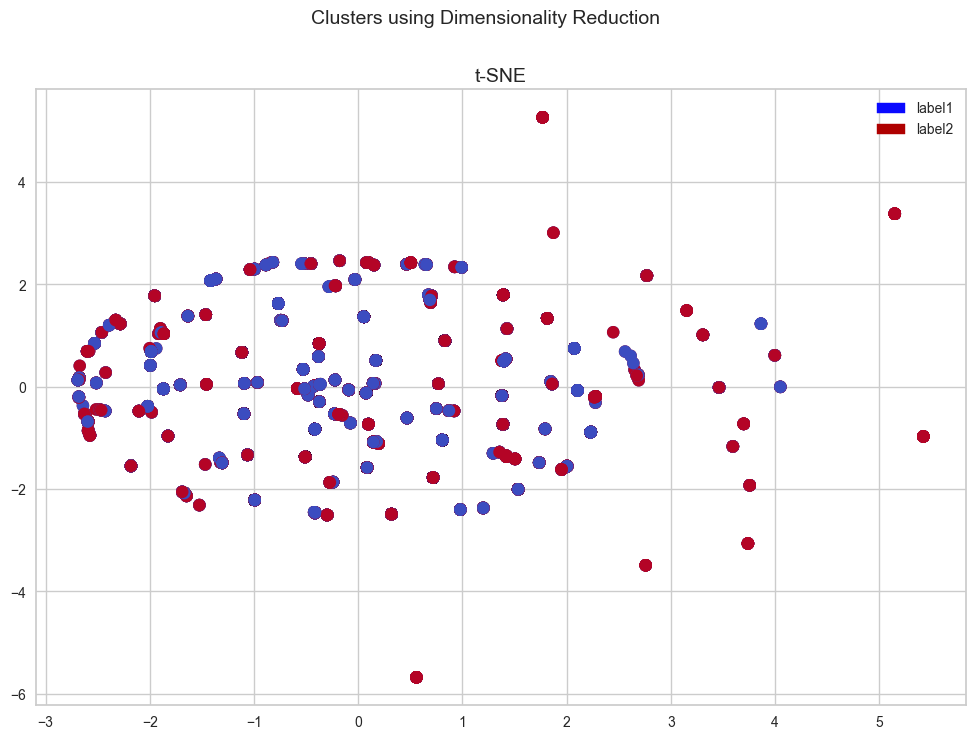

In [32]:
y = Data_Frame['Target']
f, (ax1) = plt.subplots(1, 1, figsize=(12,8))     # This line creates a figure with one subplot
# labels = ['Label1', 'Label2']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='label1')  # create Patch object
red_patch = mpatches.Patch(color='#AF0000', label='label2')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='label1', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 4), cmap='coolwarm', label='label2', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])  # This line adds the two Patch objects to the legend.


plt.show()

In [36]:
Reindexed_Data = Data['Tweet'] 

In [34]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)   # This line vectorizes the text sample using the CountVectorizer object. This creates a NumPy array where each row represents a document in the text sample and each column represents a word. The value of each cell in the array represents the number of times the word in that column appears in the document in that row.
    vectorized_total = np.sum(vectorized_headlines, axis=0) # This line calculates the total number of times each word appears in the text sample. This is done by summing the values in each column of the vectorized text sample.
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1) # This line sorts the words in descending order by their frequency. The np.argsort() function returns an array containing the indices of the sorted elements of the input array. The np.flip() function flips the order of the elements in the array
    word_values = np.flip(np.sort(vectorized_total)[0,:],1) #  returns the values of the sorted words instead of the indices.
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1])) 
    for i in range(n_top_words):  # This loop iterates over the top n_top_words words and sets the corresponding value in the word_vectors array to 1. This creates a binary representation of the top n_top_words words.
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii',errors="ignore").decode('utf-8',errors="ignore") for # This line converts the binary representation of the top n_top_words words back to a list of words. The count_vectorizer.inverse_transform() function converts a vectorized text sample back to a list of words
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0]) # This line returns a tuple of the top n_top_words words and their accompanying counts

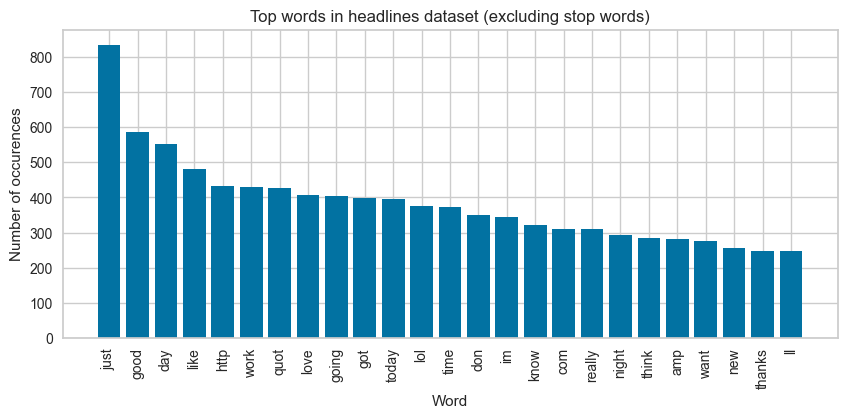

In [38]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=Reindexed_Data)

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

# NLP


TfidfVectorizer is a class in the scikit-learn library that is used to transform text data into a matrix of TF-IDF features. TF-IDF features are numerical representations of the importance of words in a document, based on their frequency in the document and their rarity in the corpus.

In [39]:
Vector = TfidfVectorizer(stop_words = 'english')
Vector.fit(Data.Tweet.values)
Features = Vector.transform(Data.ModifiedTweet.values)  # How the importance of word is

In [41]:
Features.shape

(10000, 18322)

# Clustring

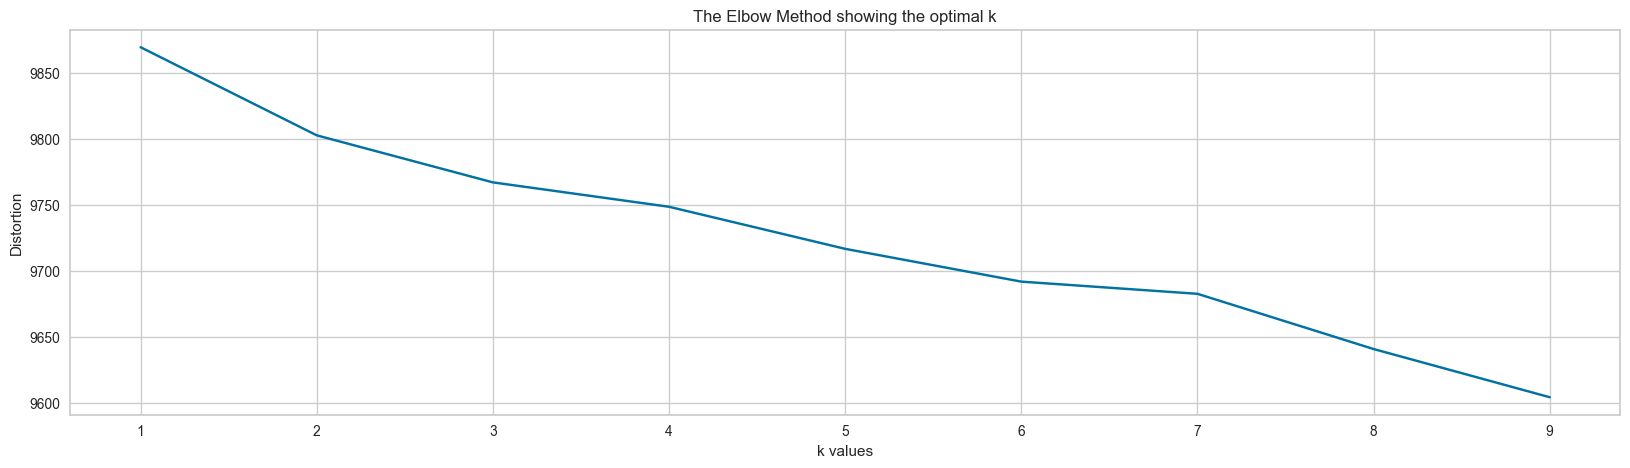

In [43]:
# Applying the Elbow method
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters = k,random_state = 7)
    kmean.fit(Features)
    distortions.append(kmean.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, distortions, '-',color = 'b')
plt.xlabel('k values')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [44]:
Class = MiniBatchKMeans(3, random_state = 1000, max_iter = 200) # 3 is the number of clusters that the MiniBatchKMeans algorithm will try to find in the data
Class.fit(Features)

MiniBatchKMeans(max_iter=200, n_clusters=3, random_state=1000)

In [45]:
Class.cluster_centers_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01328489e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.46114993e-05, 0.00000000e+00, 3.21372104e-05, ...,
        9.85103346e-05, 1.42045029e-05, 1.18813525e-04]])

In [46]:
len(Class.cluster_centers_) , len(Class.cluster_centers_[0])

(3, 18322)

# PCA

In [47]:
PCA = PCA(n_components = 2)
X_pca= PCA.fit(Features.toarray())
Y_pca = PCA.transform(Features.toarray())

In [48]:
Y_pca

array([[-0.0210449 , -0.06220808],
       [-0.01702816,  0.00071315],
       [-0.02034192, -0.00392693],
       ...,
       [-0.0165901 , -0.01200764],
       [-0.01752716,  0.00231016],
       [ 0.37459399, -0.00078924]])

In [50]:
len(Y_pca) , len(Y_pca[0])

(10000, 2)

# Kmeans

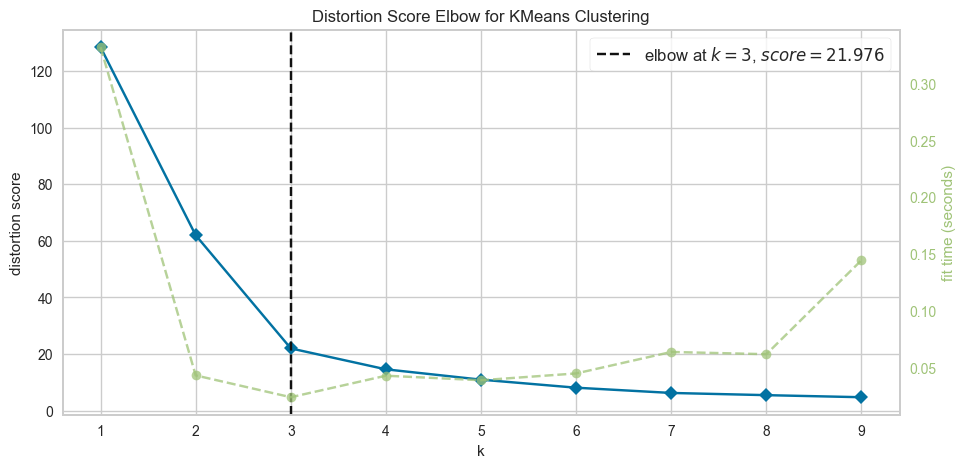

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
Kmeans = KMeans()
Visualizer = KElbowVisualizer(Kmeans, k=(1,10), size=(1080,500))
Visualizer.fit(Y_pca)
Visualizer.show()


In [54]:
Model = KMeans(n_clusters=3,random_state=1000)
Model.fit(Y_pca)
pred_labels = Model.labels_
pred_centers = Model.cluster_centers_
df_centers = pd.DataFrame(pred_centers, columns=['x', 'y'])
df_centers.head(1)

,x,y
0,-0.014327,-0.009993


- The purpose of this code is to perform K-Means clustering on a dataset and to extract the predicted cluster labels and cluster centers. The predicted cluster labels can be used to identify which cluster each data point belongs to. The cluster centers can be used to visualize the clusters and to identify the most representative points in each cluster.

In [58]:
df_cluster = pd.DataFrame(columns=['x','y','label'])
df_cluster['x'] = Y_pca[:,0]
df_cluster['y'] = Y_pca[:,1]
df_cluster['label'] = Model.labels_
df_cluster.head(1)



,x,y,label
0,-0.021045,-0.062208,0


Text(0.5, 1.0, 'scatter plot')

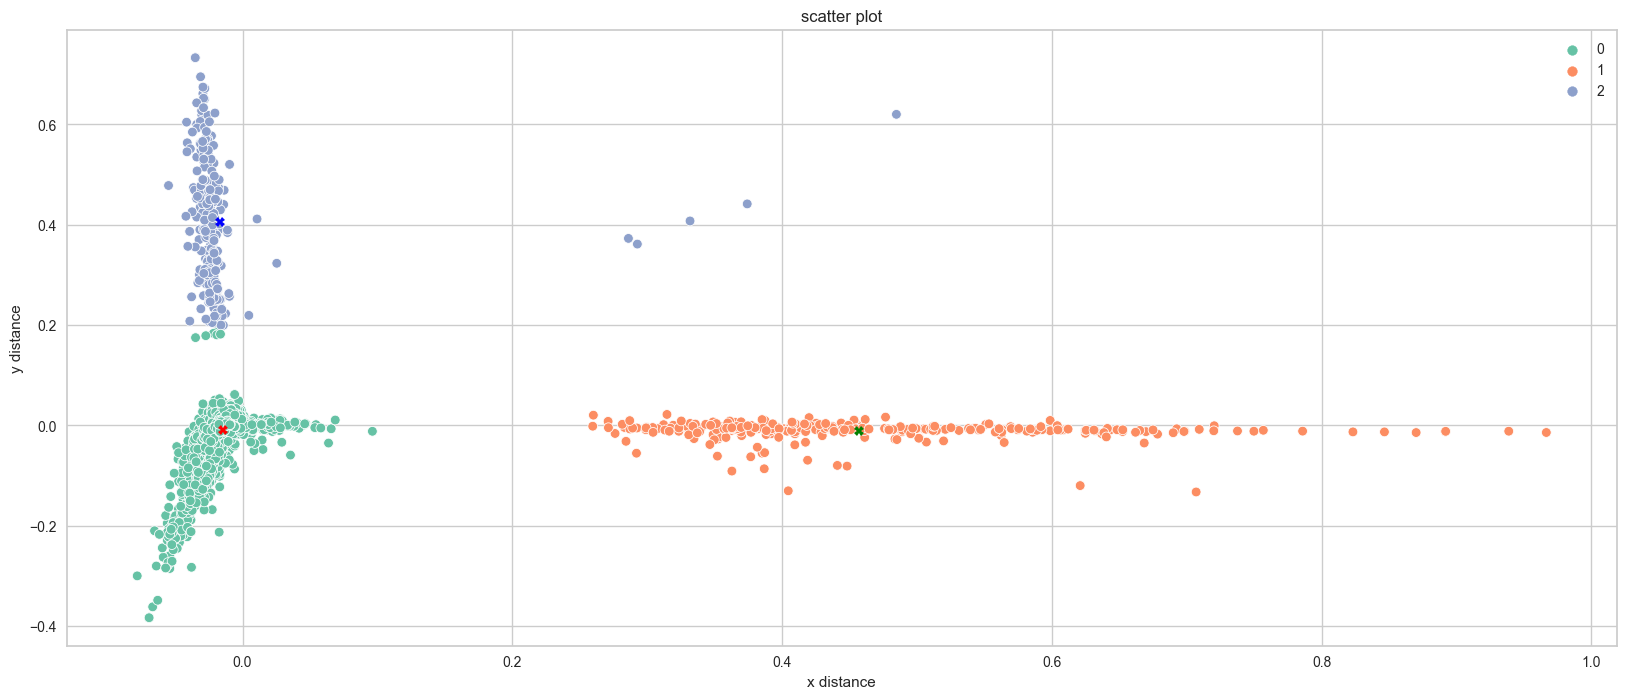

In [63]:
plt.figure(figsize=(20,8))

sns.scatterplot(x=Y_pca[:, 0], y=Y_pca[:, 1], hue=pred_labels.tolist(), palette='Set2')
colors = ['red', 'green', 'blue', 'yellow']

for i, color in enumerate(df_centers.index.tolist()):
    plt.plot(df_centers['x'][i], df_centers['y'][i], 'X', label='K-means center: %d' % i, color=colors[i])
    
plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('scatter plot')


# Evaluation

In [64]:
order_centroids = Class.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[11222, 10006,  2795, ..., 12023, 12022,     0],
       [ 6688,  1936, 16415, ..., 11998, 11997,  9160],
       [ 8688,  6715,  2795, ...,  6928,  6927,  9160]], dtype=int64)

In [66]:
# Getting the name of the vectors
terms = Vector.get_feature_names_out()

In [67]:
# Printing all the most frequancy words in the three clusters
for i in range(3):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind]),
    print('*'*50)

Cluster 0:
 need
 make
 ca
 gon
 na
 really
 just
 work
 hope
 day
 im
 good
 let
 think
 soon
 help
 sleep
 today
 feeling
 job
**************************************************
Cluster 1:
 going
 bed
 tomorrow
 just
 work
 im
 today
 day
 school
 sleep
 ca
 good
 tonight
 home
 head
 miss
 wait
 sad
 thing
 lol
**************************************************
Cluster 2:
 just
 good
 ca
 day
 work
 like
 love
 got
 lol
 na
 today
 thanks
 quot
 know
 time
 want
 night
 really
 wish
 miss
**************************************************


In [70]:
Predi = Vector.transform(["i just really need to sleep"])
prediction = Class.predict(Predi)
print(prediction)

[0]


In [69]:
Predi = Vector.transform(["I'm going to bed"])
prediction = Class.predict(Predi)
print(prediction)

[1]


In [71]:
Predi = Vector.transform(["today work is good"])
prediction = Class.predict(Predi)
print(prediction)

[2]
